# Casos confirmados por región en Chile
> Total de casos confirmados por región.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
#hide
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [2]:
#hide
data_raw = pd.read_csv(
    "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo.csv",
    index_col='Region')

# Total de casos confirmados por región

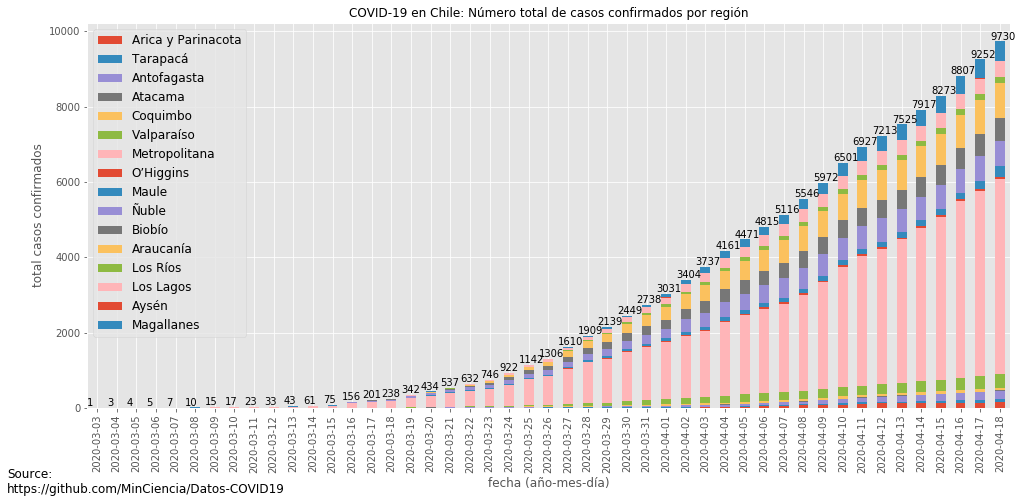

In [3]:
#hide_input
fig, ax = plt.subplots(figsize=(14,7))
data_raw[:-1].T.plot(ax=ax, kind="bar", stacked=True)
for i, val in enumerate(data_raw.loc['Total']):
    ax.text(i-0.5, val+50, str(int(val)), fontsize=10)
plt.legend(fontsize='large')
ax.set_title(f'COVID-19 en Chile: Número total de casos confirmados por región', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='large')
ax.set_ylabel(f'total casos confirmados', fontsize='large')
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [5]:
#hide
data = pd.DataFrame()
data_raw = pd.read_csv(
    "https://raw.githubusercontent.com/alonsosilvaallende/Datos-COVID19/master/output/producto4/2020-03-24-CasosConfirmados-totalRegional.csv",
    index_col='Region')
data['2020-03-24'] = data_raw['Fallecidos']

In [6]:
#hide
first_death_date = '2020-03-24'
today = '2020-04-18'
total_days = (pd.to_datetime(today)-pd.to_datetime(first_death_date)).days

In [7]:
#hide
for i in np.arange(total_days+1):
  date = (pd.to_datetime(first_death_date)+pd.DateOffset(i)).strftime('%Y-%m-%d')
  s = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/" + date + "-CasosConfirmados-totalRegional.csv"
  data_by_date = pd.read_csv(s)
  if 'Fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Fallecidos"].values
  elif 'Casos fallecidos' in data_by_date.columns:
    data[date] = data_by_date["Casos fallecidos"].values
  else:
    data[date] = data_by_date[" Casos fallecidos"].values

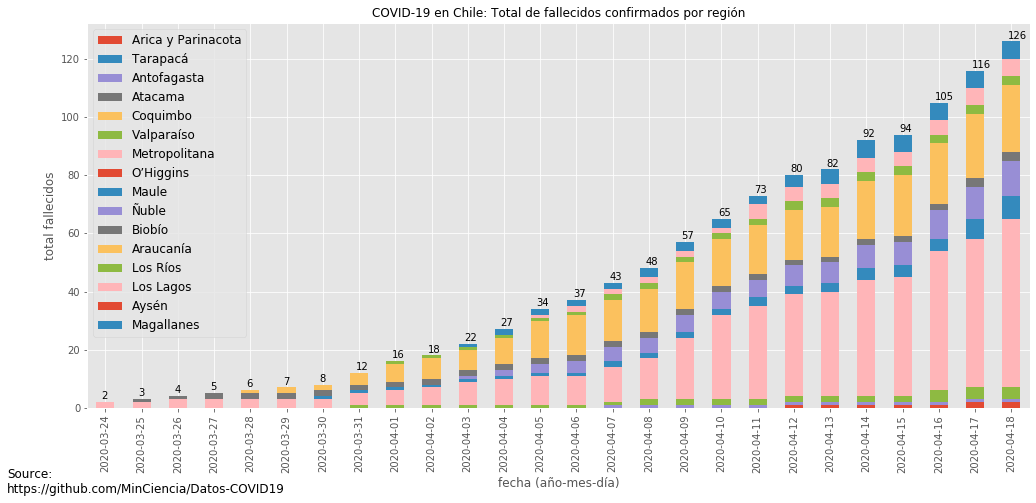

In [8]:
#hide_input
fig, ax = plt.subplots(figsize=(14,7))
data[:-1].T.plot(ax=ax, kind="bar", stacked=True)
for i, val in enumerate(data.loc['Total']):
    ax.text(i-0.1, val+1, str(int(val)), fontsize=10)
plt.legend(fontsize='large')
ax.set_title(f'COVID-19 en Chile: Total de fallecidos confirmados por región', fontsize='large')
ax.set_xlabel(f'fecha (año-mes-día)', fontsize='large')
ax.set_ylabel(f'total fallecidos', fontsize='large')
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-80,-60), fontsize='large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()